# this notebook is just for testing

In [1]:
from platform import python_version
print(python_version())

3.8.10


In [39]:
#show info
!ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json test_vids/OPT_vids/rush_fiel_vmaf75bf_AVC.mp4

{
    "programs": [

    ],
    "streams": [
        {
            "index": 0,
            "codec_name": "h264",
            "codec_long_name": "H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10",
            "profile": "High",
            "codec_type": "video",
            "codec_tag_string": "avc1",
            "codec_tag": "0x31637661",
            "width": 1920,
            "height": 1080,
            "coded_width": 1920,
            "coded_height": 1080,
            "closed_captions": 0,
            "film_grain": 0,
            "has_b_frames": 2,
            "pix_fmt": "yuv420p",
            "level": 40,
            "chroma_location": "left",
            "field_order": "progressive",
            "refs": 1,
            "is_avc": "true",
            "nal_length_size": "4",
            "id": "0x1",
            "r_frame_rate": "2997/100",
            "avg_frame_rate": "94905/3167",
            "time_base": "1/11988",
            "start_pts": 0,
            "start_time": "0.000000",
          

[1920  1080; 1536  864; 1216  684; 960  540; 768  432; 608  342; 480  270; 384  216; 320  180; 256  144]

In [ ]:
!!ffmpeg -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
            -i test_vids/OPT_vids/rush_fiel_vmaf75bf_AVC.mp4\
            -lavfi "[0:v]setpts=PTS-STARTPTS[ref];\
                    [1:v]scale=1920x1080:flags=bicubic,setpts=PTS-STARTPTS[dist];\
                    [dist][ref]libvmaf=feature=name=psnr:log_path=rd_results/vmaf_logs.json:log_fmt=json" \
            -f null -

In [ ]:
!ffplay -f rawvideo -video_size 640x360 test_vids/downsampled/smithy_640.yuv

In [3]:
import subprocess
import json
command="ffprobe -v error -select_streams v:0 -show_entries format:stream -print_format json test_vids/encoded/smithyHEVC_cf34.mp4"
cout = subprocess.run(command.split(), stdout=subprocess.PIPE, stderr=subprocess.STDOUT).stdout
dict = json.loads(cout)  # Convert data from JSON string to dictionary
print(dict)

{'programs': [], 'streams': [{'index': 0, 'codec_name': 'hevc', 'codec_long_name': 'H.265 / HEVC (High Efficiency Video Coding)', 'profile': 'Main', 'codec_type': 'video', 'codec_tag_string': 'hev1', 'codec_tag': '0x31766568', 'width': 3840, 'height': 2160, 'coded_width': 3840, 'coded_height': 2160, 'closed_captions': 0, 'film_grain': 0, 'has_b_frames': 2, 'pix_fmt': 'yuv420p', 'level': 153, 'color_range': 'tv', 'chroma_location': 'left', 'field_order': 'progressive', 'refs': 1, 'id': '0x1', 'r_frame_rate': '50/1', 'avg_frame_rate': '50/1', 'time_base': '1/12800', 'start_pts': 0, 'start_time': '0.000000', 'duration_ts': 384000, 'duration': '30.000000', 'bit_rate': '5591491', 'nb_frames': '1500', 'extradata_size': 2202, 'disposition': {'default': 1, 'dub': 0, 'original': 0, 'comment': 0, 'lyrics': 0, 'karaoke': 0, 'forced': 0, 'hearing_impaired': 0, 'visual_impaired': 0, 'clean_effects': 0, 'attached_pic': 0, 'timed_thumbnails': 0, 'captions': 0, 'descriptions': 0, 'metadata': 0, 'depen

In [6]:
import numpy as np
A = [[1,2,3],[3,3,3]]
print(np.einsum('ij->i', A)/3)

[2. 3.]


In [1]:
import subprocess
c_seq = "ffmpeg -i test_vids/srcRAW_FullHD/rush_field_cuts_1080p.y4m \
        -filter:v scale=480x270 test_vids/srcRAW_SD/rush_field_cuts_SDp.y4m"
subprocess.call(c_seq, shell=True)

ffmpeg version N-106635-g83e1a1de88 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/home/ubuntu/ffmpeg_build --pkg-config-flags=--static --extra-cflags=-I/home/ubuntu/ffmpeg_build/include --extra-ldflags=-L/home/ubuntu/ffmpeg_build/lib --extra-libs='-lpthread -lm' --ld=g++ --bindir=/home/ubuntu/bin --enable-gpl --enable-gnutls --enable-libaom --enable-libass --enable-libfdk-aac --enable-libfreetype --enable-libmp3lame --enable-libopus --enable-libsvtav1 --enable-libdav1d --enable-libvorbis --enable-libvpx --enable-libx264 --enable-libx265 --enable-libvmaf --enable-version3 --enable-nonfree
  libavutil      57. 24.101 / 57. 24.101
  libavcodec     59. 26.100 / 59. 26.100
  libavformat    59. 22.100 / 59. 22.100
  libavdevice    59.  6.100 / 59.  6.100
  libavfilter     8. 33.100 /  8. 33.100
  libswscale      6.  6.100 /  6.  6.100
  libswresample   4.  6.100 /  4.  6.100
  libpostproc    56.  5.100 / 56.  5.100

0

In [ ]:
import csv
import json

source = "testscene"
data_list = []

json_file = "rd_results/rd_" + source + ".json"
with open(json_file, 'r') as r:
    i_data = json.load(r)
for item in i_data:
    v_entry = []
    for meta, value in item.items():
        v_entry.append(value)
    data_list.append(v_entry)
    
header = ["index", "content", "file", "codec", "width", "height", "fps", "crf", "bitrate", "vmaf", "psnr"]

csv_file = "rd_results/rd_" + source + ".csv"
with open(csv_file, "w") as file:
    csv_writer = csv.writer(file)
    csv_writer.writerow(header)
    for row in data_list:
        csv_writer.writerow(row)

In [3]:
import os
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = os.path.relpath(filedialog.askopenfilename())
print(file_path)

test_vids/srcRAW_HD/big_buck_bunny_720p24.y4m


In [40]:
!ffprobe -hide_banner -show_frames test_vids/temp_encoded/1/27_AVC.mp4 | grep "pict_type=I"

Input #0, mov,mp4,m4a,3gp,3g2,mj2, from 'test_vids/temp_encoded/1/27_AVC.mp4':
  Metadata:
    major_brand     : isom
    minor_version   : 512
    compatible_brands: isomiso2avc1mp41
    encoder         : Lavf59.22.100
  Duration: 00:00:02.00, start: 0.000000, bitrate: 8674 kb/s
  Stream #0:0[0x1](und): Video: h264 (High) (avc1 / 0x31637661), yuv420p(progressive), 1920x1080, 8672 kb/s, 29.97 fps, 29.97 tbr, 11988 tbn (default)
    Metadata:
      handler_name    : VideoHandler
      vendor_id       : [0][0][0][0]
pict_type=I


In [8]:
res_matrix = {"crf": [17], "bitrate": [10253, 25102, 25841]}
for t in res_matrix:
    for x in res_matrix[t]:
        print(t + "_" + str(x))

crf_17
bitrate_10253
bitrate_25102
bitrate_25841


In [88]:
import numpy as np
num_scenes = 4
a = np.zeros((num_scenes,8))
a[1][1]= 6
a[1][2]= 6
print(a)
print(np.einsum('ij->j',a))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 6. 6. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
[0. 6. 6. 0. 0. 0. 0. 0.]


In [3]:
import numpy as np
a = np.zeros(5)
def suzz(i,d):
    a[i]=d
for i in range(0,5):
    suzz(i,i+i)
print(a)

[0. 2. 4. 6. 8.]


In [13]:
import numpy as np
a = [32,32,33]
print(np.asarray(a)-1)

[31 31 32]


In [91]:
import numpy as np
a=np.array([[2,8,9,1,25],[1,2,3,4,5]])
print(np.argmin(a, axis=1))

[3 0]


In [26]:
import numpy as np
a = np.array([5,5,5])
c = np.array([5,5,5])
print((a == c).all())

True


In [104]:
import numpy as np
def interval(l,n):
    w = (l[1] - l[0]) / (n - 1)
    return np.array([round(l[0]+i*w) for i in range(n)])
num_pts = 30 #more for more precision
print(interval([10,40], num_pts))

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40]


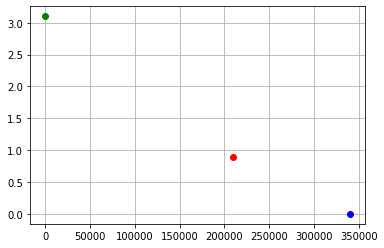

In [30]:
import matplotlib.pyplot as pl
p=[209822.17340554183, 0.8954175554971342]
l0=[340099.87709208, 0]
l1=[0, 3.102292521198141]
pl.plot(p[0], p[1], 'ro')
pl.plot(l0[0], l0[1], 'bo')
pl.plot(l1[0], l1[1], 'go')
pl.grid(True)
l0 = [(m*t_pts["rate"][s][s_mins[s]] - t_pts["dist"][s][s_mins[s]])/m,0]
l1 = [0,t_pts["dist"][s][s_mins[s]] - m*t_pts["rate"][s][s_mins[s]]]